# 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch:

| | Kommun    | Population |
|-|-----------|------------|
|0| Malmö     | 347949     |
|1| Stockholm | 975551     |
|2| Uppsala   | 233839     |
|3| Göteborg  | 583056     |

- a) Use your DataFrame to print out all the cities. (*)

- b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

- c) Sort the cities by population from largest to smallest. (*)

- d) Filter out the three largest cities. (*)

- e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city.

In [109]:
# 1
import pandas as pd

# Creates series to add to dataframe
kommuner = pd.Series({0:"Malmö", 1:"Stockholm", 2:"Uppsala", 3:"Göteborg"})
populationer = pd.Series({0:347949, 1:975551, 2:233839, 3:583056})

# Create dataframe
dfcities = pd.DataFrame({"Kommun":kommuner, "Population":populationer})

# 1a: print cities
print("1 a)")
print(dfcities["Kommun"])

# 1b: print Göteborg
print("\n1 b)")
print(dfcities[dfcities["Kommun"] == "Göteborg"])

# 1c: sort largest to smallest, ie descending order
print("\n1 c)")
dfcities = dfcities.sort_values(by="Population", ascending=False)
print(dfcities)

# 1d: filter out the 3 largest cities
print("\n1 d)")
print(dfcities.head(3))


1 a)
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

1 b)
     Kommun  Population
3  Göteborg      583056

1 c)
      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949
2    Uppsala      233839

1 d)
      Kommun  Population
1  Stockholm      975551
3   Göteborg      583056
0      Malmö      347949


In [110]:

# 1e: add column with percentages of swedens pop

# wrong solution
# sweden's population
swedenpop = 10379295

# Extract populations from cities data frame
popnumber = dfcities["Population"]

# Save percentages in a list using list comprehension
percentages = [pop/swedenpop*100 for pop in popnumber]

# Merge this series into sorted dataframe
dfcities["Population (%)"] = [f"{percent:.1f}" for percent in percentages]

# Print to check
dfcities

# Extra codes for references

# Extract indeces in the sorted order as from the sorted dataframe
#popindex = [i for i in popnumber.index]

# Save all in a new series, using list comprehension
#procentuella = pd.Series({i : f"{percent:.1f}" for i,percent in zip(popindex,percentages)})

# Merge this series into sorted dataframe
#dfcities["Population (%)"] = procentuella

# Save data into a new dataframe (this works, but is not sorted)
#dfcities2 = pd.DataFrame({"Kommun":kommuner, "Population":populationer, "Population (%)":procentuella})



,Kommun,Population,Population (%)
1,Stockholm,975551,9.4
3,Göteborg,583056,5.6
0,Malmö,347949,3.4
2,Uppsala,233839,2.3


In [108]:
# 1e add percentage column to sorted dataframe

# sweden's population
swedenpop = 10379295

# Add percentage column to dfcities, containing population column divided by population etc.
# times 100 to percentage and rounded to first decimal
dfcities["Population (%)"] = (dfcities["Population"]/swedenpop*100).round(1)

# print nicely
dfcities


,Kommun,Population,Population (%)
1,Stockholm,975551,9.4
3,Göteborg,583056,5.6
0,Malmö,347949,3.4
2,Uppsala,233839,2.3


# 2. Cities in Sweden - real dataset (*)

Go into this page, scroll down and download the Excel file containing Swedish population dataset from SCB.

a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

> df.head()

> df.info()

> df.describe()

Feel free to do more explorations. (*)

b) Clean your data so that the head looks like this: (*)

c) Sort the cities by population from largest to smallest. (*)

d) Filter out the five smallest cities. (*)

e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

f) Plot a bar chart for the five largest cities and the five smallest cities. (*)


Swedens population in 2020: 10379295
Swedens population in 2019: 10327589


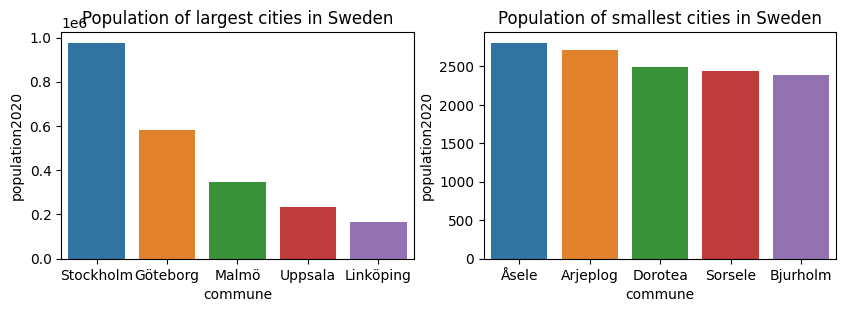

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load city data from SCB
dfcities = pd.read_excel("../data/komtopp50_2020.xlsx", sheet_name="Totalt", skiprows=6)
# dfcities.head(10)

# Checked the data quality with .head()
# So I knew I should skip 6 rows
# I could also see that the Columns should be:
# rank2020, rank2019, commune, population2020, population2019, difference

# Rename column names
column_namedict = {
            2020 : "rank2020",
            2019 : "rank2019",
    "Unnamed: 2" : "commune",
        "2020.1" : "population2020",
        "2019.1" : "population2019",
             "%" : "difference (%)"}

dfcities = dfcities.rename(column_namedict, axis="columns")
#dfcities.head(10)

dfcities = dfcities.sort_values(by="rank2020")

# Filter out 5 smallest cities
fivesmallest = dfcities.tail()

# Compute swedens population in 2019 and 2020
pop2020 = dfcities["population2020"].sum()
pop2019 = dfcities["population2019"].sum()

print(f"Swedens population in 2020: {pop2020}")
print(f"Swedens population in 2019: {pop2019}")

# Filter out five largest citites
fivelargest = dfcities.head()

# Plot bar charts of five largest and smallest
fig,ax = plt.subplots(1,2, dpi=100, figsize=(10,3))
sns.barplot(data=fivelargest, x="commune", y="population2020", ax=ax[0])
sns.barplot(data=fivesmallest, x="commune", y="population2020", ax=ax[1])
ax[0].set(title="Population of largest cities in Sweden");
ax[1].set(title="Population of smallest cities in Sweden");


In [2]:
# Load city data from SCB
# Remove 6 first rows, as seen in head()
dfcitymen = pd.read_excel("../data/komtopp50_2020.xlsx", sheet_name="Män", skiprows=6)
dfcitywomen = pd.read_excel("../data/komtopp50_2020.xlsx", sheet_name="Kvinnor", skiprows=6)

# Faulty column names:
# 2020, 2019, Unnamed: 2, 2020.1, 2019.1, %

# Add correct column names, same as above, ie column_namedict
dfcitymen = dfcitymen.rename(column_namedict, axis="columns")
dfcitywomen = dfcitywomen.rename(column_namedict, axis="columns")

# Add additional column with gender
dfcitymen["gender"] = "man"
dfcitywomen["gender"] = "woman"

#dfcitymen.head(10)
#dfcitywomen.head(10)

# Vertically merge and remove two columns
dfcitymerge = pd.concat([dfcitymen,dfcitywomen]).drop(["rank2019","rank2020"], axis="columns")

# Change column names in total dfcities
# and remove ranks
# and sort by city name
dfcities = dfcities.rename({
    "population2020":"total pop 2020",
    "population2019":"total pop 2019"
        }, axis="columns").drop(["rank2019","rank2020"], axis="columns").sort_values(by="commune")

#dfcitymerge
#dfcities


In [40]:
dfcitymerge

,commune,population2020,population2019,difference (%),gender
0,Ale,16256,16054,1.258253,man
1,Alingsås,20702,20646,0.271239,man
2,Alvesta,10367,10339,0.270819,man
3,Aneby,3503,3498,0.142939,man
4,Arboga,7094,7114,-0.281136,man
...,...,...,...,...,...
285,Österåker,22997,22442,2.473042,woman
286,Östhammar,10846,10803,0.398038,woman
287,Östra Göinge,7270,7262,0.110162,woman
288,Överkalix,1559,1578,-1.204056,woman


In [3]:
# Continues here instead

# Create double total population data frame
#df_double_cities = pd.concat([dfcities,dfcities])
#df_double_cities.sort_values(by="commune")

#df_double_cities.info()
#dfcitymerge.info()

#df_cities_totalmerge = pd.concat([dfcitymerge,df_double_cities], axis="columns")
df_cities_totalmerge = dfcitymerge.join(dfcities, lsuffix="commune").drop("communecommune", axis="columns")
df_cities_totalmerge.sort_values(by="total pop 2020", ascending=False)

# TODO
# Kolla dokumentationen på pandas.join
# Prata med Kokchun om din merge här, du får extra "commune" inskrivet i vissa kolumner...

# TODO
# barplots etc
# 3e and onward

,population2020,population2019,difference (%)commune,gender,commune,total pop 2020,total pop 2019,difference (%)
198,482982,482220,0.158019,man,Stockholm,975551,974073,0.151734
198,492569,491853,0.145572,woman,Stockholm,975551,974073,0.151734
57,290551,288973,0.546072,woman,Göteborg,583056,579281,0.651670
57,292505,290308,0.756782,man,Göteborg,583056,579281,0.651670
134,175411,173543,1.07639,woman,Malmö,347949,344166,1.099179
...,...,...,...,...,...,...,...,...
29,1171,1195,-2.008368,woman,Dorotea,2498,2551,-2.077617
194,1285,1319,-2.57771,man,Sorsele,2442,2489,-1.888309
194,1157,1170,-1.111111,woman,Sorsele,2442,2489,-1.888309
12,1154,1159,-0.431406,woman,Bjurholm,2387,2408,-0.872093
